In [0]:
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout,Flatten,Reshape
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
import pickle
import seaborn as sns
plt.rcParams['figure.figsize']=(15,8)

In [0]:
import tensorflow as tf
import keras


In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from keras.datasets import fashion_mnist 

In [0]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

In [29]:
#Finding the number of samples in the training and testing datsets
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


label for each image: 0
label for each image: 0
label for each image: 0
label for each image: 0
label for each image: 0
label for each image: 0
label for each image: 0
label for each image: 0
label for each image: 0
label for each image: 0


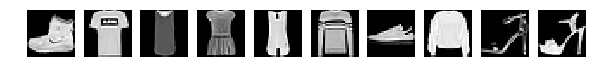

In [30]:
#Displaying the random sample of images by using subplot to see what is there in the dataset that we are working on

%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,1))
for i in range(10):
  plt.subplot(1,10,i+1)
  plt.imshow(x_train[i].reshape(28,28),cmap='gray')
  plt.axis('off')
  print("label for each image: %s" % (np.argmax(y_train[0:10][i])))
plt.show()

In [31]:
x_train.shape

(60000, 28, 28)

In [32]:
x_test.shape

(10000, 28, 28)

In [33]:
y_train.shape

(60000,)

In [34]:
y_test.shape

(10000,)

In [0]:
#The point here is that y_train and y_test would contain the labels from 0-9 which is there in this dataset 
# while the x_train and x_test are the actual images which have been converted into the matrix with the help of the numpy arrays

In [36]:
#Doing the one hot encoding and also normalizing the x_train and x_test between 0-1 instead of 0-255 by dividing both by 255
x_train=x_train.reshape(x_train.shape[0],28,28,1).astype('float32')
x_test=x_test.reshape(x_test.shape[0],28,28,1).astype('float32')
x_train/=255
x_test/=255
y_train=keras.utils.to_categorical(y_train,10)
y_test=keras.utils.to_categorical(y_test,10)

print("The Data")
print('x_train shape:',x_train.shape)
print(x_train.shape[0],"train samples")
print(x_test.shape[0],"test samples")

The Data
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
TRAIN=False
BATCH_SIZE=32
EPOCHS=10

In [40]:

    # Define model
model2 = Sequential()

    # 1st Conv Layer
model2.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
model2.add(Activation('relu'))

    # 2nd Conv Layer
model2.add(Convolution2D(32, 3, 3))
model2.add(Activation('relu'))

    # Fully Connected Layer
model2.add(Flatten())
model2.add(Dense(128))
model2.add(Activation('relu'))

    # Prediction Layer
model2.add(Dense(10))
model2.add(Activation('softmax'))

    # Loss and Optimizer
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

    # Train the model2
model2.fit(x_train, y_train, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, 
validation_data=(x_test, y_test), callbacks=callback_list)
    



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 179s 3ms/step - loss: 0.3742 - acc: 0.8641 - val_loss: 0.2985 - val_acc: 0.8892
Epoch 2/10
60000/60000 [==============================] - 183s 3ms/step - loss: 0.2314 - acc: 0.9160 - val_loss: 0.2719 - val_acc: 0.9010
Epoch 3/10
60000/60000 [==============================] - 210s 3ms/step - loss: 0.1693 - acc: 0.9372 - val_loss: 0.2568 - val_acc: 0.9138
Epoch 4/10
60000/60000 [==============================] - 180s 3ms/step - loss: 0.1192 - acc: 0.9556 - val_loss: 0.2459 - val_acc: 0.9158
Epoch 5/10
60000/60000 [==============================] - 181s 3ms/step - loss: 0.0801 - acc: 0.9702 - val_loss: 0.3145 - val_acc: 0.9149
Epoch 6/10
60000/60000 [==============================] - 184s 3ms/step - loss: 0.0545 - acc: 0.9802 - val_loss: 0.3903 - val_acc: 0.9082
Epoch 7/10
60000/60000 [==============================] - 180s 3ms/step - loss: 0.0372 - acc: 0.9865 - val_loss: 0.3747 - 

In [41]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_5 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_6 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               2359424   
_________________________________________________________________
activation_7 (Activation)    (None, 128)               0         
__________

In [42]:
loss_and_metrics = model2.evaluate(x_test, y_test)
print(loss_and_metrics)

10000/10000 [==============================] - 6s 602us/step
[0.5176972859881819, 0.9081]


In [0]:

BATCH_SIZE = 32
EPOCHS = 10

In [44]:

    # Define Model
    model3 = Sequential()

    # 1st Conv Layer
    model3.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
    model3.add(Activation('relu'))

    # 2nd Conv Layer
    model3.add(Convolution2D(32, 3, 3))
    model3.add(Activation('relu'))

    # Max Pooling
    model3.add(MaxPooling2D(pool_size=(2,2)))
    
    # Dropout
    model3.add(Dropout(0.25))

    # Fully Connected Layer
    model3.add(Flatten())
    model3.add(Dense(128))
    model3.add(Activation('relu'))
    
    # More Dropout
    model3.add(Dropout(0.5))

    # Prediction Layer
    model3.add(Dense(10))
    model3.add(Activation('softmax'))

    # Loss and Optimizer
    model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Store Training Results
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=7, verbose=1, mode='auto')
    callback_list = [early_stopping]

    # Train the model
    model3.fit(x_train, y_train, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, 
              validation_data=(x_test, y_test), callbacks=callback_list)
    


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 133s 2ms/step - loss: 0.5019 - acc: 0.8206 - val_loss: 0.3267 - val_acc: 0.8787
Epoch 2/10
60000/60000 [==============================] - 133s 2ms/step - loss: 0.3433 - acc: 0.8766 - val_loss: 0.2819 - val_acc: 0.8975
Epoch 3/10
60000/60000 [==============================] - 133s 2ms/step - loss: 0.2965 - acc: 0.8927 - val_loss: 0.2601 - val_acc: 0.9027
Epoch 4/10
60000/60000 [==============================] - 133s 2ms/step - loss: 0.2649 - acc: 0.9044 - val_loss: 0.2329 - val_acc: 0.9150
Epoch 5/10
60000/60000 [==============================] - 133s 2ms/step - loss: 0.2413 - acc: 0.9114 - val_loss: 0.2341 - val_acc: 0.9166
Epoch 6/10
60000/60000 [==============================] - 133s 2ms/step - loss: 0.2249 - acc: 0.9156 - val_loss: 0.2263 - val_acc: 0.9168
Epoch 7/10
60000/60000 [==============================] - 133s 2ms/step - loss: 0.2117 - acc: 0.9214 - val_loss: 0.2351 - 

In [46]:
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_9 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_10 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4608)              0         
__________

In [0]:
model3.save("Model.h1")